In [4]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [5]:
#Load Cleansed Data
df_analysis_StayAtHome = pd.read_csv('/content/New_Cleansed_Data.csv')

In [6]:
#Transform StayAtHomeRequirements Info
df_analysis_StayAtHome.loc[df_analysis_StayAtHome['StayAtHomeRequirements'] == 0, 'StayAtHomeRequirementsDetail'] = 'No_Measure'
df_analysis_StayAtHome.loc[df_analysis_StayAtHome['StayAtHomeRequirements'] == 1, 'StayAtHomeRequirementsDetail'] = 'Recommended_StayAtHome'
df_analysis_StayAtHome.loc[df_analysis_StayAtHome['StayAtHomeRequirements'] == 2, 'StayAtHomeRequirementsDetail'] = 'Required_StayAtHome_Few'
df_analysis_StayAtHome.loc[df_analysis_StayAtHome['StayAtHomeRequirements'] == 3, 'StayAtHomeRequirementsDetail'] = 'Required_StayAtHome_All'

In [7]:
#Select Specific Columns
df_analysis_StayAtHome = df_analysis_StayAtHome[['State', 'Date','StayAtHomeRequirementsDetail']]

In [8]:
df_graph_StayAtHome = df_analysis_StayAtHome.groupby(['State', 'StayAtHomeRequirementsDetail'])['Date'].count().reset_index(name = 'Counts')

In [9]:
df1_graph_StayAtHome = pd.pivot_table(df_graph_StayAtHome, values= 'Counts', index= ['State'], columns= 'StayAtHomeRequirementsDetail').reset_index()

In [18]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Number of Days')

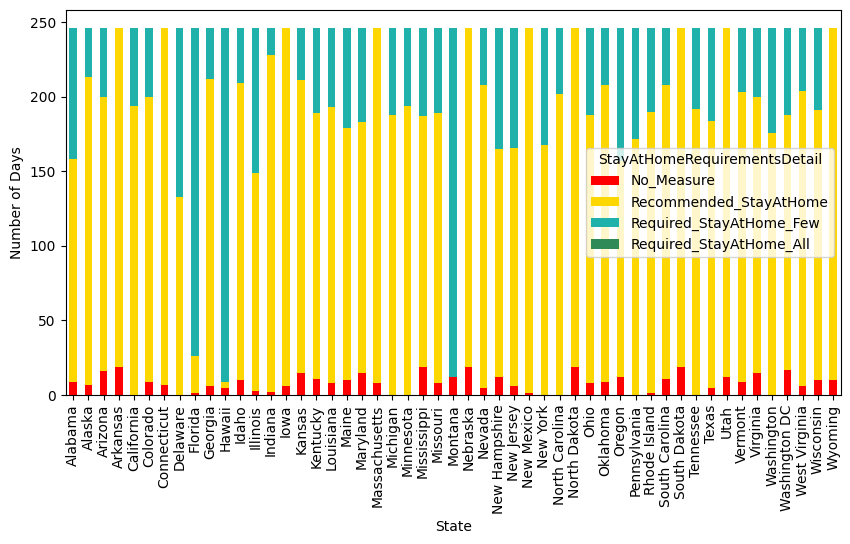

In [30]:
if "Required_StayAtHome_All" not in df1_graph_StayAtHome.columns:
    df1_graph_StayAtHome = df1_graph_StayAtHome.assign(Required_StayAtHome_All=0)

colors = ["red", "gold", "lightseagreen", "seagreen"]
df1_graph_StayAtHome.plot(x= "State", y= ["No_Measure","Recommended_StayAtHome", "Required_StayAtHome_Few", "Required_StayAtHome_All"], kind= "bar", stacked= "true", figsize= (10, 5), color=colors)
plt.ylabel("Number of Days")